In [2]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

import networkx as nx
from networkx.readwrite import json_graph

import json

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Pre-processing of **Playlists** dataset

💡Create a graph with nodes = track_id, and edges (u,v) such that track u and track v are in the same playlist. We only keep tracks which are the `tracks` dataset.

In [3]:
playlists = pd.read_csv("data/playlist.csv")
                              
with open("data/spotify_id.txt", 'r') as file:
    ids = file.read()
    
#Remove 'spotify:track:' from id_track
playlists['id_track'] = playlists['id_track'].apply(lambda x : x[14:])

#Only keep the tracks that are in the dataset
playlists = playlists[playlists['id_track'].isin(ids.split())]

playlists

,id_playlist,name_playlist,id_track,name_track
4,10000,Funk,5jSz894ljfWE0IcHBSM39i,Raspberry Beret
158,10006,vibe,5d8yMIlqJH78lwOUP7T3oF,Real
251,10006,vibe,6gU9OKjOE7ghfEd55oRO57,The Weekend
316,10007,Indie stuff,6M23RkYPbVR91c4iWVNkcl,Changing
337,10007,Indie stuff,2PlP2rRrgSz8lC7MpH3e4e,Let’s Go
...,...,...,...,...
66215217,995995,HIP HOP,6eT7xZZlB2mwyzJ2sUKG6w,White Iverson
66215417,995997,Just listen,7vRriwrloYVaoAe3a9wJHe,"i hate u, i love u (feat. olivia o'brien)"
66215484,995998,car jams,27L8sESb3KR79asDUBu8nW,Stacy's Mom
66215507,995998,car jams,0lnxrQAd9ZxbhBBe7d8FO8,MMMBop


In [4]:
playlists['id_playlist'].unique().shape

(486729,)

In [4]:
#Create a graph
G = nx.Graph()

#Add nodes
G.add_nodes_from(ids.split())

#Add edges
for playlist_id, group_df in playlists.groupby('id_playlist'):
    tracks = group_df['id_track'].tolist()
    for i in range(len(tracks)):
        for j in range(i+1, len(tracks)):
            if G.has_edge(tracks[i], tracks[j]):
                G[tracks[i]][tracks[j]]['weight'] += 1
            else:
                G.add_edge(tracks[i], tracks[j], weight=1)

## Some statistics about the graph

In [5]:
print(nx.info(G))

Graph with 12990 nodes and 276899 edges


C:\Users\affol\AppData\Local\Temp/ipykernel_22540/2606185536.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


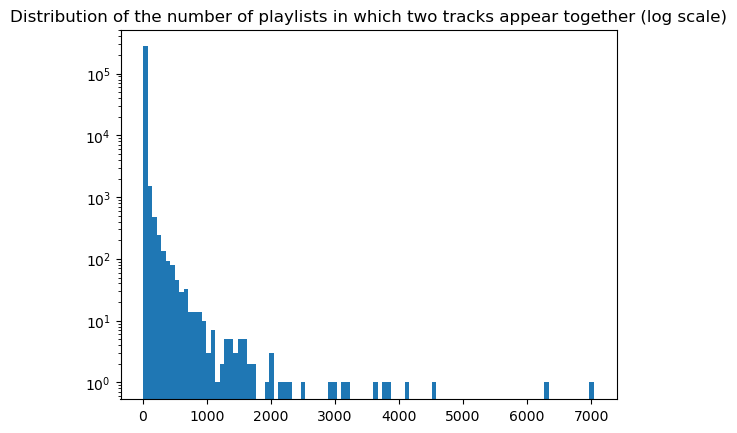

In [6]:
# Distribution about the graph edges 
weights = [G[u][v]['weight'] for u,v in G.edges()]
plt.hist(weights, bins=100)

plt.yscale('log')
plt.title("Distribution of the number of playlists in which two tracks appear together (log scale)")
plt.show()

In [7]:
#Components
components = list(nx.connected_components(G))
print("Number of components: ", len(components))
print("Size of components: ", [len(c) for c in components])
print()

#Largest component
largest_component = max(components, key=len)
print("Size of largest component: ", len(largest_component))
print()

Number of components:  8108
Size of components:  [4870, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [11]:
#Eliminate from the graph the nodes that are not in the largest component
G = G.subgraph(largest_component)
nx.info(G)

C:\Users\affol\AppData\Local\Temp/ipykernel_22540/2761242341.py:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


'Graph with 4870 nodes and 276882 edges'

In [16]:
#Create adjacency matrix
adj = nx.adjacency_matrix(G)
adj = adj.todense()

#Transform the adjacency matrix into a dataframe
adj_df = pd.DataFrame(adj)
adj_df

,0,1,2,3,4,5,6,7,8,9,...,4860,4861,4862,4863,4864,4865,4866,4867,4868,4869
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,23,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4865,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,15,0,0,0,0
4866,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4867,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4868,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#Retrieve nodes names
nodes = list(G.nodes())

#Only keep the nodes that are in the largest component
playlists = playlists[playlists['id_track'].isin(nodes)]
playlists

,id_playlist,name_playlist,id_track,name_track
4,10000,Funk,5jSz894ljfWE0IcHBSM39i,Raspberry Beret
158,10006,vibe,5d8yMIlqJH78lwOUP7T3oF,Real
251,10006,vibe,6gU9OKjOE7ghfEd55oRO57,The Weekend
316,10007,Indie stuff,6M23RkYPbVR91c4iWVNkcl,Changing
337,10007,Indie stuff,2PlP2rRrgSz8lC7MpH3e4e,Let’s Go
...,...,...,...,...
66215217,995995,HIP HOP,6eT7xZZlB2mwyzJ2sUKG6w,White Iverson
66215417,995997,Just listen,7vRriwrloYVaoAe3a9wJHe,"i hate u, i love u (feat. olivia o'brien)"
66215484,995998,car jams,27L8sESb3KR79asDUBu8nW,Stacy's Mom
66215507,995998,car jams,0lnxrQAd9ZxbhBBe7d8FO8,MMMBop


In [23]:
edges = list(G.edges())

edges_df = pd.DataFrame(edges, columns=['source', 'target'])

edges_df.to_csv("data/edges.csv", index=False)

In [9]:
#Triadic closure
triadic_closure = nx.transitivity(G)
print("Triadic closure: ", triadic_closure)

#Clustering coefficient
clustering_coefficient = nx.average_clustering(G)
print("Clustering coefficient: ", clustering_coefficient)

Triadic closure:  0.3286239675586549
Clustering coefficient:  0.5584974802636639


The triadic closure coefficient is 0.3286, which suggests a moderate level of triadic closure in the network. This means that nodes in the network tend to form connections with other nodes that they have a mutual connection with, but there is still room for more connections to be made.

The clustering coefficient value is 0.558, indicating a relatively high level of clustering, meaning that nodes tend to cluster together in the graph. 

In [10]:
# Save the graph in Python format
nx.write_graphml(G, 'data/graph.graphml')
print('Graph saved in data/graph.graphml')

# Save the graph in JSON format
data = json_graph.node_link_data(G)
with open('data/graph.json', 'w') as file:
    json.dump(data, file)
print('Graph saved in data/graph.json')

Graph saved in data/graph.graphml
Graph saved in data/graph.json
